<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/learn_tf_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification with Tensorflow

### Typical architecture of a Classification Neural Network
* An Input Layer
* Some Hidden Layers
* An Output Layer

The following are some standard values we will often see in our classification models

|Hyperparameter|Binary Classification|Multiclass Classification
---|---|---
Input Layer shape|Same as the number of features| Same as binary classification
Hidden layer(s)|Problem specific, min=1, max=unlimited| Same as binary classification
Neurons per hidden layer|Problem specific, generally 10 to 100|Same as binary classification
Output Layer shape|1 (one class or the other)|1 per class(e.g. 3 for food, person or dog photo)
Hidden activation|Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)|Same as binary classification
Output activation| [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)|[Softmax](https://en.wikipedia.org/wiki/Softmax_function)
Loss function|[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression)([`tf.keras.losses.BinaryCrossEntropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TF)|[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression)([`tf.keras.losses.CategoricalCrossEntropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TF)
Optimizer|[SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)| Same as binary classification

### Step 1 : Try building a classification model on toy dataset
> 🔑 Note: It's a common practice to get us and the model we build, works on a toy dataset before moving to actual problem. Treat this as a rehersal experiment before the actual one.

Let's make use of Scikit-Learn's `make_circles()` function to create a non-linear dataset

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

# Create circles
X,y = make_circles(n_samples
                   ,noise=0.03
                   ,random_state=42)

In [2]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

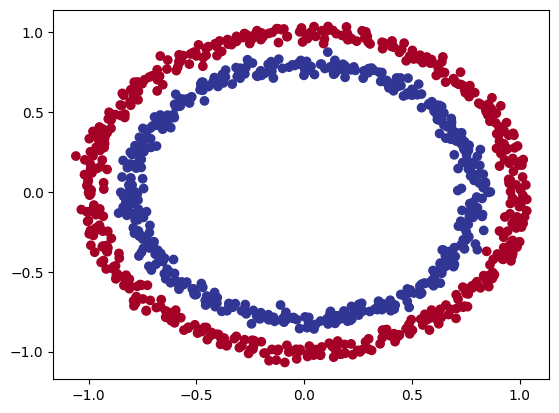

In [4]:
#visualize the data with plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [5]:
# Shape of data
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

Steps to create the model
1. **Create a model** - piece together the layers of neural network
2. **Compile a model** - define how a model's performance should be measured and improved.
3. **Fitting a model** - letting the model find patterns in data

In [7]:
## Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# set seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy()
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=["accuracy"]
              )

# fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.4258 - accuracy: 0.5210
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2159 - accuracy: 0.5320
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 3.8463 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 2.2622 - accuracy: 0.5160
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7458 - accuracy: 0.4980


In [9]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Lets try adding one more layer and training it longer

In [11]:
# set seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ,tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy()
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=["accuracy"])

# fit the model
model_2.fit(X,y,epochs=300,verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932850480079651, 0.5]

## Improving the model

#### Approach 1
1. Increase the number of layers
2. Increase the number of hidden units
3. Use Adam as optimizer.
4. Train for more epochs

In [13]:
# set seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy()
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=['accuracy'])

# Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4990


[0.6949465274810791, 0.49900001287460327]

> 🔑Note - Whenever the model is performing strangely or there is something going on with data we are not able to explain, only thing can save us is to **visualize**. **Visualize** the data, the model, the prediction.

Plotting a decision boundary can be one of the effective ways to visualize the data and the model predictions.



In [22]:
import numpy as np
def plot_decision_boundary(model,X,y)-> None:
  """
    Plots the decision boundary created by a model prediction on X.
    This function has been adopted from following resources
    1. CS231n : https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx,yy = np.meshgrid( np.linspace(x_min,x_max,100)
                      ,np.linspace(y_min,y_max,100)
                      )

  # create X values
  x_in =np.c_[xx.ravel(),yy.ravel()]

  y_pred = model(x_in)

  # check if the model is multi-class
  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred,axis=1)).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binary classification


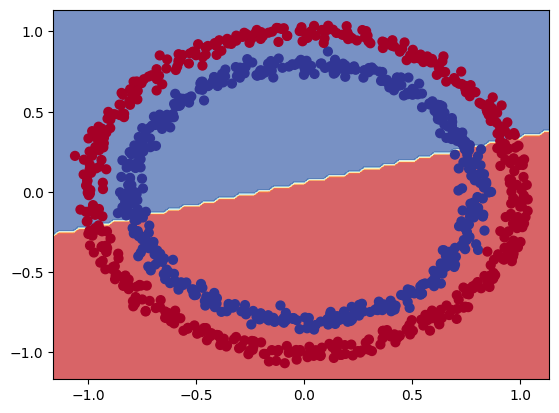

In [23]:
plot_decision_boundary(model_3,X,y)